In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%bash
uname -a
whoami

which cmsRun

Linux lxplus056.cern.ch 3.10.0-693.5.2.el7.x86_64 #1 SMP Fri Oct 20 20:32:50 UTC 2017 x86_64 x86_64 x86_64 GNU/Linux
innocent
/cvmfs/cms.cern.ch/slc7_amd64_gcc630/cms/cmssw/CMSSW_9_4_0/bin/slc7_amd64_gcc630/cmsRun


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
from multiprocessing import Pool
from DataFormats.FWLite import Handle, Events
from FWLiteUtils import *

Welcome to JupyROOT 6.10/09


In [4]:
def loadTracks(tracks, weight, tkParsA) :
    for tk in tracks.product() :
        if not tk.trackHighPurity() : continue
        if (tk.pt()<0.7) : continue
        # if (abs(tk.dz(pvp))>0.5) : continue # only PV tracks
        tkParsA.append([tk.eta(),tk.phi(),tk.pt(), weight])


In [5]:
def loop(args) :
    tkParsA = []
    ne = 0
    files = args[0]
    l = args[1]
    for f in files :
        print f
        events = Events(f)
        ls = eventsInLumiRange(f, events,l[0],l[1])
        if not ls : continue
        mini = Mini()
        a= events.to(ls[0][0])
        mini.set(events)
        rid = runid(events,mini.pu()) 
        zbi = mini.zbIndex(events)
        print "ZB indeces: ", zbi
        names = events.object().triggerNames(mini.triggerBits[0].product())
        for i in xrange(mini.triggerBits[0].product().size()):
            if mini.triggerBits[0].product().accept(i) :print "Trigger ", i, names.triggerName(i)
        for l in ls : 
         for i in range(l[0],l[1]) :
          a= events.to(i)
          mini.set(events)
          ok = False
          for t in zbi : 
            if (mini.triggerBits[0].product().accept(t)) :
                ok = True
                break
          if (i%5000==0) : 
            evid = runid(events,mini.pu())
            print "Event", i , evid
          if not ok : continue
          weight = 1./mini.pu() if mini.pu()>0 else 1
          ne+=1
          loadTracks(mini.cand[0], weight, tkParsA)
          loadTracks(mini.ltk[0], weight, tkParsA)
      
    print len(tkParsA)
    tkPars = np.array(zip(*tkParsA), dtype=np.float)
    print len(tkPars)
    print 'done'
    return (rid,ne,tkPars)

In [6]:
def loadFile(name) :
    loaded = np.load('/tmp/'+name+'.npz')
    runid = loaded['arr_0']
    ne = loaded['arr_1']
    n = len(runid)
    tkPars = [loaded['arr_'+str(i+2)] for i in range(0,n)]
    return runid,ne,tkPars
def saveFile(name,runid,ne,tkPars) :
    np.savez_compressed('/tmp/'+name,runid,ne,*tkPars)

In [8]:
AOD = True
MC = True

f1 = fullFileName(tier2+'/store/relval/CMSSW_9_4_0_pre3/RelValMinBias_13/MINIAODSIM/94X_mc2017_realistic_PixFailScenario_Run306432-v1/20000/', \
['1CEA23D7-36D9-E711-B69A-0025905A60CE.root ', '922B1BD8-36D9-E711-A518-0CC47A4C8E2E.root']
                 )

f2 = fullFileName(tier2 + '/store/relval/CMSSW_9_4_0_pre3/RelValNuGun/MINIAODSIM/PU25ns_94X_mc2017_realistic_PixFailScenario_Run306432_HS_AVE35-v1/20000/', \
['7474D56B-A8DA-E711-B0A2-0242AC130002.root','847AA2F0-B3DA-E711-91DF-0242AC130002.root','E26F8904-B1DA-E711-A851-0242AC130002.root']
                 )
f3 = fullFileName(tier2 + '/store/relval/CMSSW_9_4_0_pre3/RelValNuGun/MINIAODSIM/PU25ns_94X_mc2017_realistic_PixFailScenario_Run306432_HS_AVE50-v1/20000/', \
['3244C02D-E6DA-E711-AACE-4C79BA1812A7.root','5AA980EB-A3DA-E711-AD4D-E0071B7A08F0.root','A277321F-9EDA-E711-B8D6-5065F3818281.root']
                 )

lall = (0,10000)

if (AOD) :
    p = Pool(6)
    ret = p.map(loop,[(f1,lall),(f2,lall),(f3,lall)])

    
#ne,tkPars = zip(*ret)

root://eoscms.cern.ch///store/relval/CMSSW_9_4_0_pre3/RelValNuGun/MINIAODSIM/PU25ns_94X_mc2017_realistic_PixFailScenario_Run306432_HS_AVE50-v1/20000/3244C02D-E6DA-E711-AACE-4C79BA1812A7.root
root://eoscms.cern.ch///store/relval/CMSSW_9_4_0_pre3/RelValMinBias_13/MINIAODSIM/94X_mc2017_realistic_PixFailScenario_Run306432-v1/20000/1CEA23D7-36D9-E711-B69A-0025905A60CE.root 
root://eoscms.cern.ch///store/relval/CMSSW_9_4_0_pre3/RelValNuGun/MINIAODSIM/PU25ns_94X_mc2017_realistic_PixFailScenario_Run306432_HS_AVE35-v1/20000/7474D56B-A8DA-E711-B0A2-0242AC130002.root
ZB indeces:  [439, 440, 441, 442, 443, 444, 445, 446, 447]
Trigger  0 digitisation_step
Trigger  1 L1simulation_step
Trigger  2 digi2raw_step
Trigger  106 HLT_DiPFJet15_NoCaloMatched_v12
Trigger  128 HLT_AK8PFJet40_v12
Trigger  160 HLT_AK8PFJetFwd40_v11
Trigger  428 HLT_Physics_v7
Trigger  429 HLT_Physics_part0_v7
Trigger  430 HLT_Physics_part1_v7
Trigger  431 HLT_Physics_part2_v7
Trigger  432 HLT_Physics_part3_v7
Trigger  433 HLT_Ph

In [9]:
if (AOD) : p.terminate()

In [10]:
if (AOD) : 
   rid,ne,tkPars = zip(*ret)
else :
      rid,ne,tkPars = loadFile('minBiasMC')
print len(rid)
if (AOD) : saveFile('minBiasMC',rid,ne,tkPars)

3


In [11]:
def onePlot(rid,ne,tkPars) :
    eta=0
    phi=1
    pt=2
    w=3
    lmx = 100./np.amin(tkPars[w])
    lmi = 100./np.amax(tkPars[w])
    lab = rid+'  {:d}:{:.2e}->{:.2e}'.format(ne,lmi,lmx)
    ya,x = np.histogram(tkPars[eta],np.linspace(-3.1,3.1,62),weights=10./float(ne)*tkPars[w])
    x.resize(len(ya))
    plt.step(x,ya,where='post',label=lab)
    return ya,x,lab
def plots(rid,ne,tkPars) :
    eta=0
    phi=1
    pt=2
    w=3
    yx = map(onePlot,rid,ne,tkPars)
    yy,xx,lab = zip(*yx)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(-3.1,3.1)
    plt.xlabel('eta')
    plt.ylabel('dn/deta')
    plt.show()

    k=0
    for y in yy :
        plt.step(xx[0],y/yy[0],where='post',label=lab[k])
        k+=1
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(-3.1,3.1)
    plt.xlabel('eta')
    plt.ylabel('eff')
    plt.show()


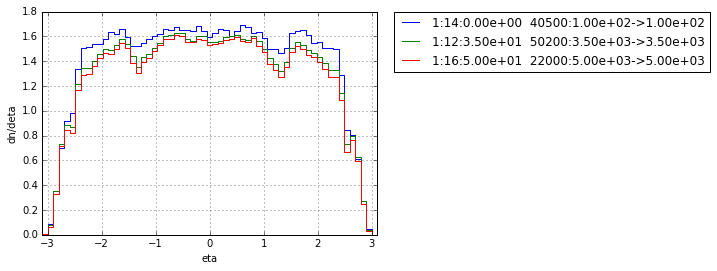

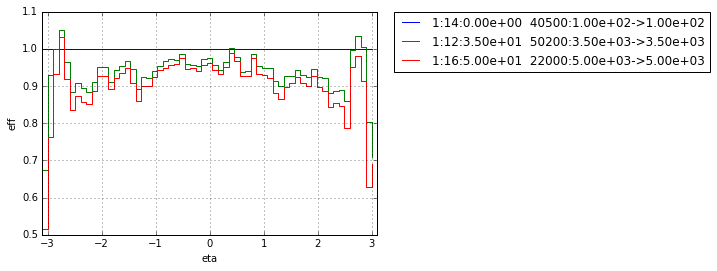

In [12]:
plots(rid,ne,tkPars)

/cvmfs/cms.cern.ch/slc7_amd64_gcc630/external/py2-pippkgs/6.0-fmblme/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/cvmfs/cms.cern.ch/slc7_amd64_gcc630/external/py2-pippkgs/6.0-fmblme/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


nan


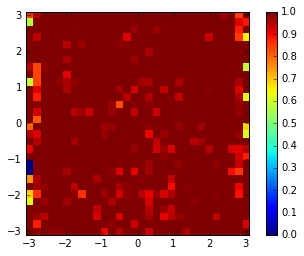

nan


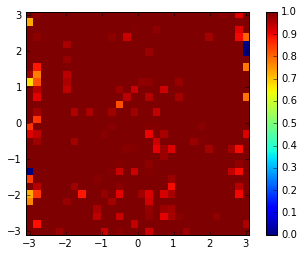

In [14]:
def plot2D(tk1,ne1,tk2,ne2):
    eta=0
    phi=1
    pt=2
    w=3
    nbins = 31
    edges = np.linspace(-3.1,3.1,nbins)
    z1,x,y = np.histogram2d(tk1[eta],tk1[phi],bins=(edges, edges),weights=10./float(ne1)*tk1[w])
    z2,x,y = np.histogram2d(tk2[eta],tk2[phi],bins=(edges, edges),weights=10./float(ne2)*tk2[w])
    z=z2.T/z1.T
    print np.amax(z)
    z = np.fmin(z,1.)
    plt.imshow(z, interpolation='nearest', origin='low', extent=[edges[0], edges[-1], edges[0], edges[-1]])
    plt.colorbar()
    plt.show()

plot2D(tkPars[1],ne[1],tkPars[0],ne[0])
plot2D(tkPars[2],ne[2],tkPars[0],ne[0])